In [11]:
pip install cryptography


   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB 325.1 kB/s eta 0:00:10
   - -------------------------------------- 0.1/3.1 MB 573.4 kB/s eta 0:00:06
   ---- ----------------------------------- 0.3/3.1 MB 1.7 MB/s eta 0:00:02
   ------ --------------------------------- 0.5/3.1 MB 2.2 MB/s eta 0:00:02
   -------- ------------------------------- 0.7/3.1 MB 2.6 MB/s eta 0:00:01
   --------------- ------------------------ 1.2/3.1 MB 3.8 MB/s eta 0:00:01
   -------------------- ------------------- 1.6/3.1 MB 4.5 MB/s eta 0:00:01
   ---------------------------- ----------- 2.2/3.1 MB 5.5 MB/s eta 0:00:01
   --------------------------------- ------ 2.6/3.1 MB 5.9 MB/s eta 0:00:01
   -------------------------------------- - 3.0/3.1 MB 6.0 MB/s eta 0:00:01
   --------------------------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='Mysql@98',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'E:\Data Analyst\SQL+Python (Project)\E-Commerce (Target) Sales Dataset Analysis'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

<>:26: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP\AppData\Local\Temp\ipykernel_392\252048795.py:26: SyntaxWarning: invalid escape sequence '\D'
  folder_path = 'E:\Data Analyst\SQL+Python (Project)\E-Commerce (Target) Sales Dataset Analysis'


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import pymysql

db = pymysql.connect(
    host='localhost',
    user='root',
    password='Mysql@98',
    database='ecommerce'
)

cur = db.cursor()

# List all unique cities where customers are located.


In [54]:
query = """select distinct customer_city from customers""" 
cur.execute(query) 
data = cur.fetchall() 
df=pd.DataFrame(data, columns = ['Unique_Cities'])
df.head()

,Unique_Cities
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017.

In [27]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017""" 
cur.execute(query) 
data = cur.fetchall() 
# "total orders palced in 2017 are", data
"total orders palced in 2017 are", data[0][0]

('total orders palced in 2017 are', 45101)

# Find the total sales per category.

In [31]:
query = """select products.product_category as category, round(sum(payments.payment_value),2) as sales
from products 
left join order_items
on products.product_id = order_items.product_id
left join payments
on payments.order_id = order_items.order_id
group by category;""" 
cur.execute(query) 
data = cur.fetchall() 

df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,sport leisure,1392127.56
1,electronics,259857.10
2,babies,539845.66
3,Construction Tools Construction,241475.63
4,Watches present,1429216.68
...,...,...
69,La Cuisine,2913.53
70,Arts and Crafts,2326.17
71,House Comfort 2,1710.54
72,insurance and services,324.51


# Calculate the percentage of orders that were paid in installments.

In [36]:
query = """select (sum(case when payment_installments >= 1 then 1 else 0 end)) / count(*)*100 from payments""" 
cur.execute(query) 
data = cur.fetchall() 
"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

# Count the number of customers from each state.

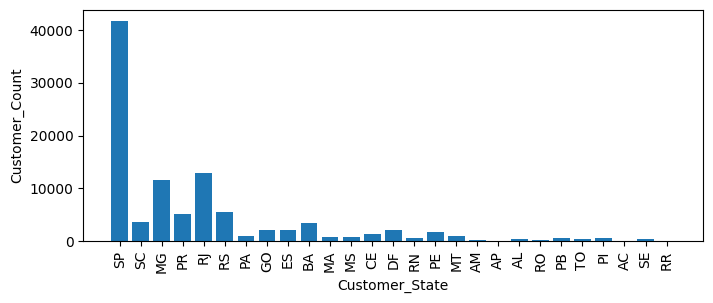

In [50]:
query = """select customer_state, count(customer_state) from customers group by customer_state;""" 
cur.execute(query) 
data = cur.fetchall() 
df=pd.DataFrame(data, columns = ['Customer_State', 'Customer_Count'])
plt.figure(figsize=(8,3))
plt.bar(df['Customer_State'], df['Customer_Count'])
plt.xlabel('Customer_State')
plt.ylabel('Customer_Count')
plt.xticks(rotation=90)
plt.show()

# Calculate the number of orders per month in 2018.

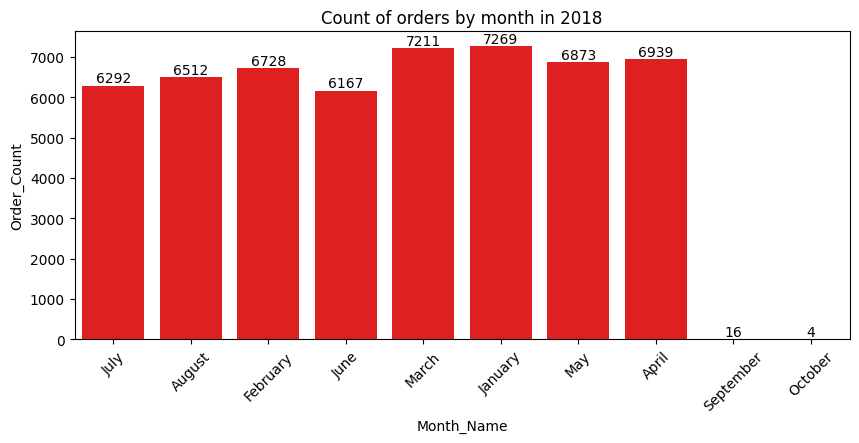

In [76]:
query = """select monthname(order_purchase_timestamp) as months_name, count(order_id) as order_count
from orders where year(order_purchase_timestamp) = 2018
group by months_name"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns = ['Month_Name', 'Order_Count'])

plt.figure(figsize=(10,4))
ax = sns.barplot(x = df['Month_Name'], y = df['Order_Count'], data = df, color = 'red')
plt.xticks(rotation=45)
plt.title('Count of orders by month in 2018')
plt.xlabel('Month_Name')
plt.ylabel('Order_Count')
ax.bar_label(ax.containers[0])
plt.show()

# Find the average number of products per order, grouped by customer city.


In [82]:
query = """with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders
left join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) as average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city;"""


cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns = ['customer_city', 'average_product_per_order'])
df.head()

,customer_city,average_product_per_order
0,treze tilias,1.27
1,indaial,1.12
2,sao jose dos campos,1.13
3,sao paulo,1.15
4,porto alegre,1.17


# Calculate the percentage of total revenue contributed by each product category.


In [86]:
query = """select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""

cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns=['Category', 'Percentage_Distributuon'])
df.head()

,Category,Percentage_Distributuon
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93


# Identify the correlation between product price and the number of times a product has been purchased.

In [92]:
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns = ['Category', 'Order_Count', 'Price'])
df.head()

import numpy as np

arr1 = df["Order_Count"]
arr2 = df["Price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157557


# Calculate the total revenue generated by each seller, and rank them by revenue.

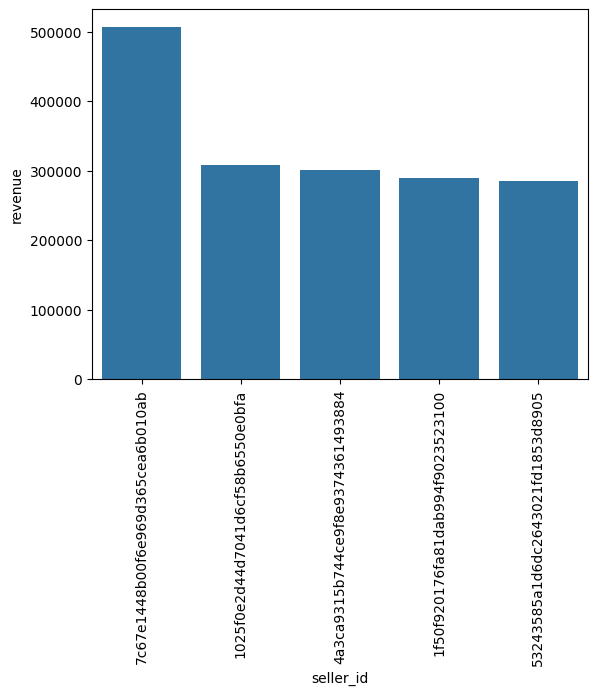

In [98]:
query = """select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a"""

cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns = ['seller_id', 'revenue', 'rank'])
df=df.head()
sns.barplot(x='seller_id', y='revenue', data=df)
plt.xticks(rotation=90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [99]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


#  Calculate the cumulative sales per month for each year.

In [100]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# Calculate the year-over-year growth rate of total sales.

In [101]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Identify the top 3 customers who spent the most money in each year.

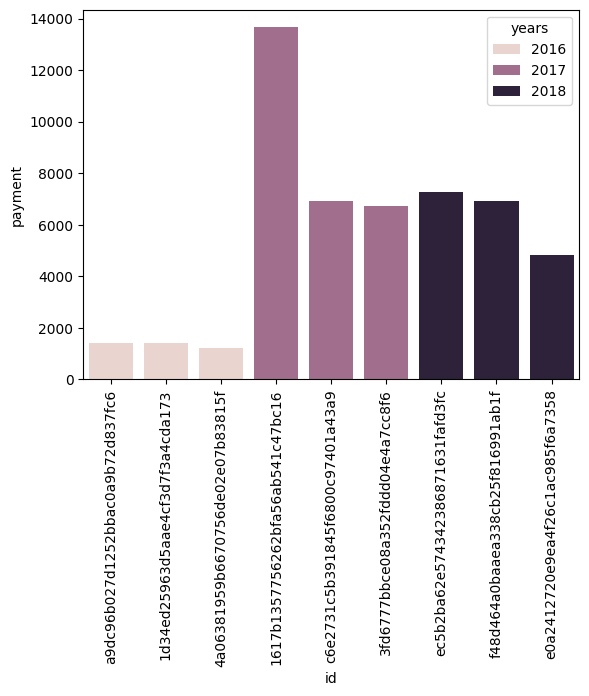

In [102]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()